# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [308]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

st_data = pd.merge(mouse_metadata , study_results, on="Mouse ID" )

st_data2 = pd.merge( study_results, mouse_metadata , on="Mouse ID" )

# Display the data table for preview

st_data2.head(20)




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [22]:
# Checking the number of mice.

unique_mice = st_data2["Mouse ID"].unique()
unique_mice_count = st_data2["Mouse ID"].value_counts()

unique_time = st_data2["Timepoint"].unique()
unique_time_count = st_data2["Timepoint"].value_counts()



# print ("Unique mice ID are below:\n")

# print (unique_mice)

# print (unique_time)
num_mice = len(st_data2["Mouse ID"].unique())
print(f"\n{num_mice} is the total number of mice")


249 is the total number of mice


In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_data_points = st_data2.loc[st_data2.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]


In [25]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_data_points

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = st_data2.copy() #Copying the database prior to removing duplicates

data = data.drop_duplicates(subset=['Mouse ID','Timepoint'],keep=False)


In [29]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(data["Mouse ID"].unique())
print(f"\n{num_mice} is the total number of mice\n")


unique_mice = data["Mouse ID"].unique()
print ("Unique mice ID are below:\n")
print (unique_mice)



249 is the total number of mice

Unique mice ID are below:

['b128' 'f932' 'g107' 'a457' 'c819' 'h246' 'p189' 'n923' 'q119' 'f993'
 'z234' 'b559' 'y260' 'x930' 'o725' 'z969' 'v835' 'r604' 'n304' 'l700'
 'x336' 'l725' 'm133' 'v295' 'a818' 'y601' 't724' 'k382' 'w422' 'c326'
 'c139' 'v339' 'a577' 'y163' 'k483' 'k804' 'o809' 'z581' 'a251' 'i386'
 'c580' 'q132' 'u327' 'v603' 'f278' 'g497' 'd474' 'o973' 'c832' 'o331'
 'm650' 'v289' 'm550' 'h428' 'r701' 'v199' 'x264' 'f234' 'c458' 'q610'
 'j913' 'a411' 'a444' 'd251' 'j989' 'y449' 'k403' 'c758' 'x402' 'r811'
 'a644' 'i177' 'g791' 'a520' 'u196' 'm546' 'w678' 'n364' 's508' 'e662'
 'z578' 'r921' 'a492' 'w540' 'v764' 'z795' 'e291' 'e584' 'e213' 'j755'
 's565' 'a366' 'p387' 'b879' 'i901' 'k862' 'g867' 's619' 'w697' 'j984'
 'c402' 'h333' 'k510' 'p981' 't451' 'a963' 'm269' 'g989' 'z314' 'o848'
 'v719' 'q597' 'c895' 'a203' 'f394' 'c264' 'n967' 'f545' 'k894' 'k754'
 'g296' 'd164' 'w575' 'x613' 'q633' 'b313' 'f129' 'j365' 'p136' 'c559'
 'a788' 's337' '

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

sum_data = data[["Drug Regimen","Tumor Volume (mm3)"]]
sum_data = sum_data.groupby("Drug Regimen")

Mean_TVolume = sum_data.mean()
Median_TVolume = sum_data.median()
Variance_TVolume = sum_data.var()
St_Dev_TVolume = sum_data.std()
St_err_TVolume = sum_data.sem()


sum_df = pd.concat([Mean_TVolume, Median_TVolume, Variance_TVolume, St_Dev_TVolume, St_err_TVolume ], axis = 1)

sum_df.columns.array[0] = "Mean Tumor Volume"
sum_df.columns.array[1] = "Median Tumor Volume"
sum_df.columns.array[2] = "Tumor Volume Variance"
sum_df.columns.array[3] = "Tumor Volume Std. Dev."
sum_df.columns.array[4] = "Tumor Volume Std. Err."
sum_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
sum_data.agg(["mean","median","var","std","sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

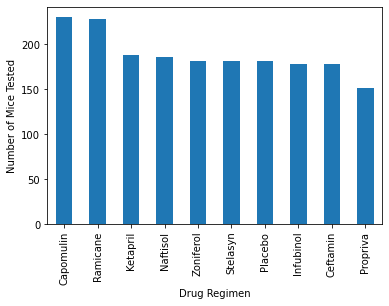

In [85]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

x =sum_data.size()

figure1 = x.sort_values(ascending=False).plot(kind="bar")

figure1.set_xlabel("Drug Regimen")
figure1.set_ylabel("Number of Mice Tested")
# Show plot
plt.show()


Text(0, 0.5, 'Number of Mice Tested')

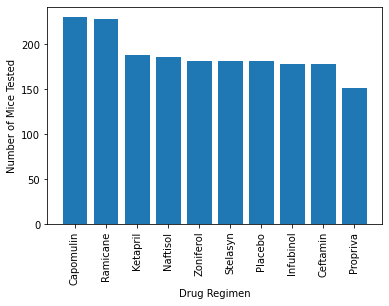

In [101]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

vec = x.sort_values(ascending=False)

x_axis = vec.index.tolist()

y_axis = vec.tolist()

# Create a bar chart based upon the above data
plt.bar(x_axis, y_axis, align="center")

plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

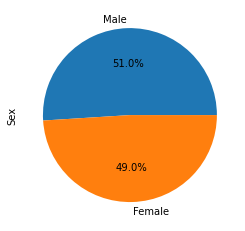

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#numbers adjusted to fit the presentation requirements
ppdata = data["Sex"].value_counts()

ppdata = round (ppdata/ppdata.sum(),2)

ppdata.plot(kind='pie',autopct='%1.1f%%');


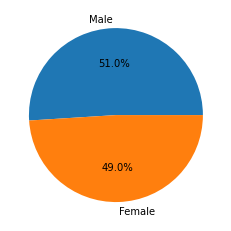

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

vec = ppdata

x_axis = vec.index.tolist()

y_axis = vec.tolist()

# Create a bar chart based upon the above data

plt.pie(y_axis, labels=x_axis, autopct="%1.1f%%");

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [211]:
# data['Mouse ID'].loc[data[subset=['Mouse ID','Timepoint']].max(),:]

test = data.groupby("Mouse ID")

# test.loc[test["Timepoint"].max(), :]

In [237]:

# Max Timeframe per Mouse ID
max_ts = test["Timepoint"].max()

num = len(max_ts)

max_time_df= data.head(0)

#Cycle to find record with Max "Timepoint" per "Mouse ID"

for number in range(num):
    first = data.loc[data['Mouse ID'] == max_ts.index[number], : ]
    res = first.loc[first["Timepoint"] == max_ts.iloc[number], :]
    max_time_df=max_time_df.append(res)


In [275]:
#Dataframe with Tumor Volume in the last Timepoint

max_time_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
907,a203,45,67.973419,2,Infubinol,Female,20,23
289,a251,45,65.525743,1,Infubinol,Female,21,25
1134,a262,45,70.717621,4,Placebo,Female,17,29
1487,a275,45,62.999356,3,Ceftamin,Female,20,28
736,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
1566,z435,10,48.710661,0,Propriva,Female,12,26
646,z578,45,30.638696,0,Ramicane,Male,11,16
279,z581,45,62.754451,3,Infubinol,Female,24,25
683,z795,45,65.741070,3,Naftisol,Female,13,29


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [310]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


treatments = max_time_df["Drug Regimen"].value_counts()

Propriva = [] 
Naftisol = [] 
Capomulin = []
Placebo = [] 
Zoniferol = [] 
Ketapril = []
Ramicane =[] 
Infubinol = [] 
Ceftamin = [] 
Stelasyn=[]

tot_treaments = len(treatments)

for treatment in range(tot_treaments):

    #Dataframe with treatment information
    treatment_df = max_time_df.loc[max_time_df["Drug Regimen"] == treatments.index[treatment],: ]

    #List with Tumor Volumes per treatment
    vec = [value for value in treatment_df["Tumor Volume (mm3)"]]

    


    #Name of the treatment in the loop
    string_name = str(treatments.index[treatment])

    #Treatment added to list depending on current treatment value
    if string_name == "Propriva":
         Propriva.append(vec)
    if string_name == "Naftisol":
         Naftisol.append(vec)
    if string_name == "Capomulin":
         Capomulin.append(vec)
    if string_name == "Placebo":
         Placebo.append(vec)
    if string_name == "Zoniferol":
         Zoniferol.append(vec)
    if string_name == "Ketapril":
         Ketapril.append(vec)
    if string_name == "Ramicane":
         Ramicane.append(vec)
    if string_name == "Infubinol":
         Infubinol.append(vec)
    if string_name == "Ceftamin":
         Ceftamin.append(vec)
    if string_name == "Stelasyn":
         Stelasyn.append(vec)
     
    treatment_df= treatment_df.copy() 
    quartiles = treatment_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile for {treatments.index[treatment]} is: {lowerq}")
    print(f"The upper quartile for {treatments.index[treatment]} is: {upperq}")
    print(f"The interquartile range for {treatments.index[treatment]} is: {iqr}")
    print(f"The the median for {treatments.index[treatment]} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers for {treatments.index[treatment]}.")
    print(f"Values above {upper_bound} could be outliers for {treatments.index[treatment]}.")


The lower quartile for Propriva is: 49.12296898
The upper quartile for Propriva is: 62.57087961
The interquartile range for Propriva is: 13.447910629999996
The the median for Propriva is: 55.84141007 
Values below 28.95110303500001 could be outliers for Propriva.
Values above 82.742745555 could be outliers for Propriva.
The lower quartile for Naftisol is: 52.07951009
The upper quartile for Naftisol is: 69.56362076
The interquartile range for Naftisol is: 17.484110670000007
The the median for Naftisol is: 63.28328821 
Values below 25.85334408499999 could be outliers for Naftisol.
Values above 95.78978676500002 could be outliers for Naftisol.
The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
The the median for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
The lower quartile 

In [304]:
# test_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
treatment_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
# quartiles

# string_name

0.25    52.476596
0.50    62.192350
0.75    69.103944
Name: Tumor Volume (mm3), dtype: float64

Index(['Propriva', 'Naftisol', 'Capomulin', 'Placebo', 'Zoniferol', 'Ketapril',
       'Ramicane', 'Infubinol', 'Ceftamin', 'Stelasyn'],
      dtype='object')

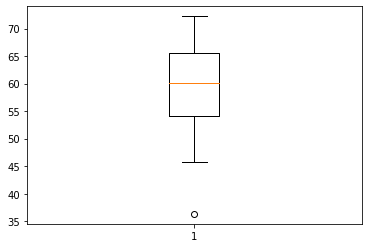

In [270]:


dat = [Capomulin, Ramicane]


fig1, ax1 = plt.subplots()
ax1.boxplot(dat)
   


treatments.index



# Infubinol_df = max_time_df.loc[max_time_df["Drug Regimen"]=="Infubinol",:]

# len(Infubinol_df)

# infu = [value for value in Infubinol_df["Tumor Volume (mm3)"]]


# fig1, ax1 = plt.subplots()
# ax1.boxplot(infu)

ValueError: X must have 2 or fewer dimensions

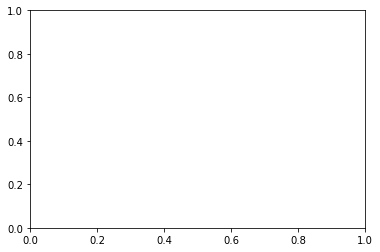

In [274]:
fig1, ax1 = plt.subplots()
ax1.boxplot(dat)
   


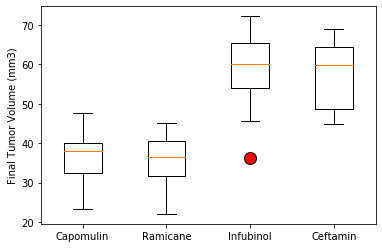

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



In [239]:
tumor_df = max_time_df["Tumor Volume (mm3)"]
treatment_df = max_time_df["Drug Regimen"]

{'whiskers': [<matplotlib.lines.Line2D at 0x11f2a581748>,
 'caps': [<matplotlib.lines.Line2D at 0x11f2a58ef88>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f2a58e2c8>],
 'medians': [<matplotlib.lines.Line2D at 0x11f2a4a5208>],
 'fliers': [<matplotlib.lines.Line2D at 0x11f2a593f48>],
 'means': []}

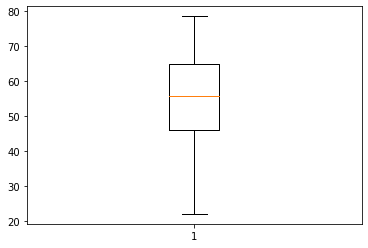

In [243]:
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_df)

## Line and Scatter Plots

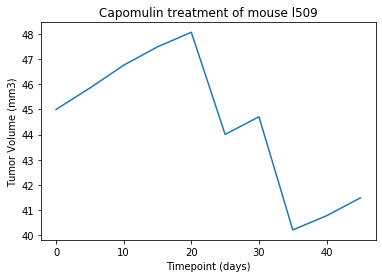

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



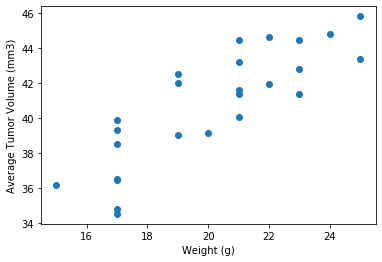

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


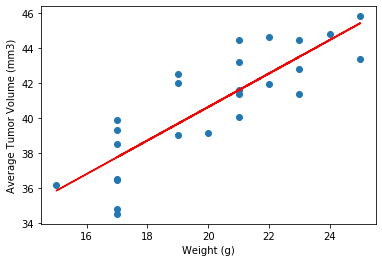

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

